In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier
from imblearn.metrics import geometric_mean_score
import matplotlib.pylab as plt
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE
from imblearn.under_sampling import EditedNearestNeighbours
import seaborn as sns

read the data file

In [51]:
OrigData = pd.read_csv('waterQuality1.csv')
OrigData.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


Check the data

In [52]:
OrigData.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [53]:
OrigData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

All fields are not null. However, the ammonia and is_safe features are of type object and this is seems incorrect.
To handle the non-numeric values, we can use the to_numeric function and convert them to Null first.

In [54]:
OrigData['ammonia'] = pd.to_numeric(OrigData['ammonia'], errors='coerce')

In [55]:
OrigData['ammonia'].isnull().sum()

3

we found only three non-numeric rows, so we can drop them.

In [56]:
OrigData.dropna(subset=['ammonia'], inplace=True)

We will do the same for the is_safe col.

In [57]:
OrigData['is_safe'] = pd.to_numeric(OrigData['is_safe'], errors='coerce')
OrigData['is_safe'].isnull().sum()

0

Check the information of the DataFrame after cleaning

In [58]:
OrigData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

Calculate the number of records in each class. It is important to check weather the classes are balanced or not.

We will separate the feature columns from the response column and create the train, validate and test sets

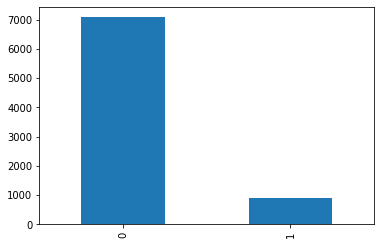

In [59]:
OrigData['is_safe'].value_counts().plot.bar()

There is a significant difference between the number of cases in each class.
So, we have to consider this during data splitting and handle it later to develop a more
accurate model.

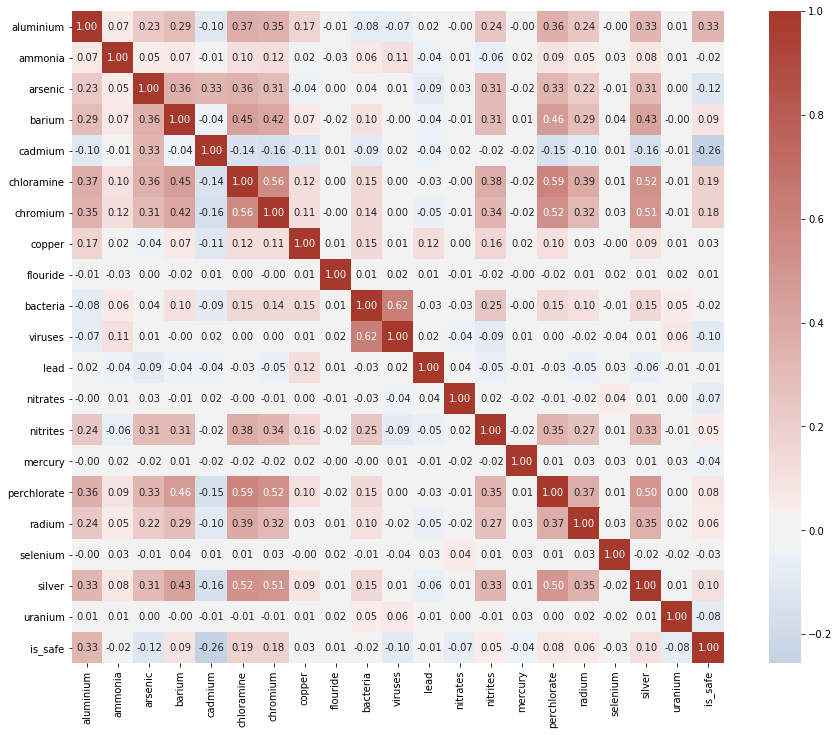

In [60]:
corr_mat = OrigData.corr()
plt.figure(figsize=(16,12))

# Create a custom diverging palette
cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

_ = sns.heatmap(corr_mat, center=0, annot=True,
                fmt='.2f', square=True, cmap=cmap)


In [61]:
y = OrigData['is_safe']
X = OrigData.drop('is_safe', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=100)

Build an initial model

In [62]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [63]:
pred = clf.predict(X_test)

In [64]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1418
           1       0.78      0.27      0.41       182

    accuracy                           0.91      1600
   macro avg       0.85      0.63      0.68      1600
weighted avg       0.90      0.91      0.89      1600



In [65]:
print(metrics.precision_score(y_test, pred))
print(metrics.recall_score(y_test, pred))
print(geometric_mean_score(y_test, pred))

0.78125
0.27472527472527475
0.521548555195155


In [66]:
clf1 = LogisticRegression(solver='liblinear', max_iter=1000, random_state=100)
clf1.fit(X_train, y_train)
pred = clf1.predict(X_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1418
           1       0.67      0.25      0.36       182

    accuracy                           0.90      1600
   macro avg       0.79      0.62      0.65      1600
weighted avg       0.88      0.90      0.88      1600



Create a Random Forest classifier (ensemble) - without sample weights

In [67]:
RF_no_weight = RandomForestClassifier(n_estimators=25, max_leaf_nodes=20, random_state=100)
RF_no_weight.fit(X_train, y_train)
pred = RF_no_weight.predict(X_test)
pred_prob_no_weight = RF_no_weight.predict_proba(X_test)
print(metrics.classification_report(y_test, pred))
print(metrics.precision_score(y_test, pred))
print(metrics.recall_score(y_test, pred))
print(geometric_mean_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1418
           1       0.85      0.54      0.66       182

    accuracy                           0.94      1600
   macro avg       0.90      0.76      0.81      1600
weighted avg       0.93      0.94      0.93      1600

0.8521739130434782
0.5384615384615384
0.7293874661177213


from the classification report, we can notice that. The model works well for the unsafe class (class 0)
because the majority of the samples belongs to this class.

Use sample weights for the minority (safe) class. we will use a weight of 7 because the majority class is seven times
the minority class

In [68]:
sample_weights = (1 * (y_train == 0)) + (5 * (y_train == 1))
clf.fit(X_train, y_train, sample_weight=sample_weights)
pred = clf.predict(X_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1418
           1       0.45      0.64      0.53       182

    accuracy                           0.87      1600
   macro avg       0.70      0.77      0.73      1600
weighted avg       0.89      0.87      0.88      1600



In [69]:
print(metrics.precision_score(y_test, pred))
print(metrics.recall_score(y_test, pred))
print(geometric_mean_score(y_test, pred))


0.4496124031007752
0.6373626373626373
0.7573219114925605


Create a Random Forest classifier (ensemble) - with sample weights

In [76]:
RF_weighted = RandomForestClassifier(n_estimators=25, max_leaf_nodes=20, random_state=100)
RF_weighted.fit(X_train, y_train, sample_weight=sample_weights)
pred = RF_weighted.predict(X_test)
pred_prob_weighted = RF_weighted.predict_proba(X_test)
print(metrics.classification_report(y_test, pred))
print('Precision: {}'.format(metrics.precision_score(y_test, pred)))
print('Recall: {}'.format(metrics.recall_score(y_test, pred)))
print('Geometric Mean Score: {}'.format(geometric_mean_score(y_test, pred)))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1418
           1       0.68      0.76      0.72       182

    accuracy                           0.93      1600
   macro avg       0.82      0.86      0.84      1600
weighted avg       0.94      0.93      0.93      1600

Precision: 0.6780487804878049
Recall: 0.7637362637362637
Geometric Mean Score: 0.8533396718818922


Check the ROC and calculate the area under the curve. We want to know if using weight improves the area under the curve
or does it only affect the classification boundaries.
We can see that using weights enhances the area under the curve and produces a better model.

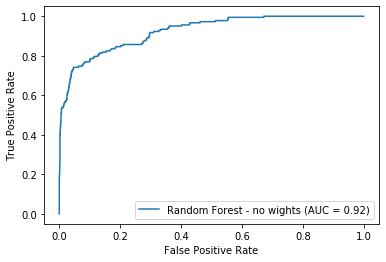

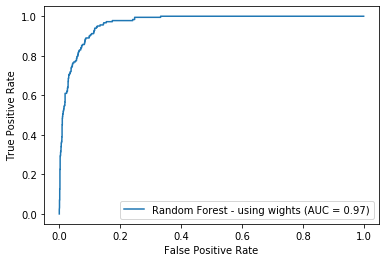

In [71]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_prob_no_weight[:,1])
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test, pred_prob_weighted[:, 1])
roc_auc = metrics.auc(fpr, tpr)
roc_auc1 = metrics.auc(fpr1, tpr1)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Random Forest - no wights')
display1 = metrics.RocCurveDisplay(fpr=fpr1, tpr=tpr1, roc_auc=roc_auc1, estimator_name='Random Forest - using wights')
display.plot()
display1.plot()

Sampling the training data. We will oversampling to increase the number of samples of
the minority class. Here, two methods will be used:
Random oversampling
SMOTE oversampling.

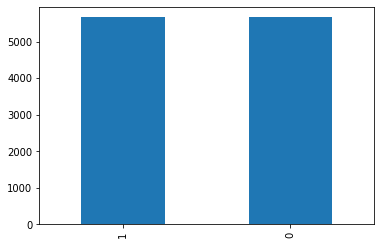

In [81]:
# ros = RandomOverSampler(random_state=100)
ros = SMOTE(random_state=100) # uncomment for oversampling using SMOTE
X_train_bl, y_train_bl = ros.fit_resample(X_train, y_train)
y_train_bl.value_counts().plot.bar()

In [82]:
RF_no_weight.fit(X_train_bl, y_train_bl)
pred = RF_no_weight.predict(X_test)
pred_prob_no_weight = RF_no_weight.predict_proba(X_test)
print(metrics.classification_report(y_test, pred))
print(metrics.precision_score(y_test, pred))
print(metrics.recall_score(y_test, pred))
print(geometric_mean_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1418
           1       0.58      0.77      0.66       182

    accuracy                           0.91      1600
   macro avg       0.78      0.85      0.81      1600
weighted avg       0.93      0.91      0.92      1600

0.5833333333333334
0.7692307692307693
0.8455667822522036


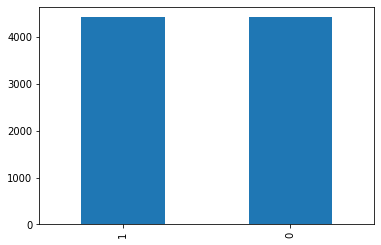

In [74]:
ros = BorderlineSMOTE(random_state=100)
rus = EditedNearestNeighbours(kind_sel='all')
X_train_bl, y_train_bl = rus.fit_resample(X_train, y_train)
X_train_bl, y_train_bl = ros.fit_resample(X_train_bl, y_train_bl)
y_train_bl.value_counts().plot.bar()

In [75]:
RF_no_weight.fit(X_train_bl, y_train_bl)
pred = RF_no_weight.predict(X_test)
pred_prob_no_weight = RF_no_weight.predict_proba(X_test)
print(metrics.classification_report(y_test, pred))
print(metrics.precision_score(y_test, pred))
print(metrics.recall_score(y_test, pred))
print(geometric_mean_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1418
           1       0.55      0.87      0.67       182

    accuracy                           0.90      1600
   macro avg       0.77      0.89      0.81      1600
weighted avg       0.93      0.90      0.91      1600

0.5486111111111112
0.8681318681318682
0.8879993861712474
